In [1]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

In [3]:
# Exercise 1: Feature Selection with SelectKBest.
# Load the Iris dataset from scikit-learn.

iris = load_iris()

In [5]:
# Split the dataset into features and target variable.

X = iris.data
y = iris.target

In [7]:
# Use SelectKBest with the chi2 score function to select the top 2 features.

df = pd.DataFrame(X, columns=iris.feature_names)

selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

In [9]:
# Print the selected feature names.

selected_features = selector.get_support(indices=True)
selected_feature_names = [iris.feature_names[i] for i in selected_features]
selected_feature_names

['petal length (cm)', 'petal width (cm)']

In [13]:
# Exercise 2: Feature Importance with Random Forest
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Load the Wine dataset from scikit-learn.

wine = load_wine()
X = wine.data  
y = wine.target  

In [17]:
# Split the dataset into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
# Train a Random Forest classifier on the training data.

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Extract and visualize feature importances.

importances = rf.feature_importances_
feature_names = wine.feature_names

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


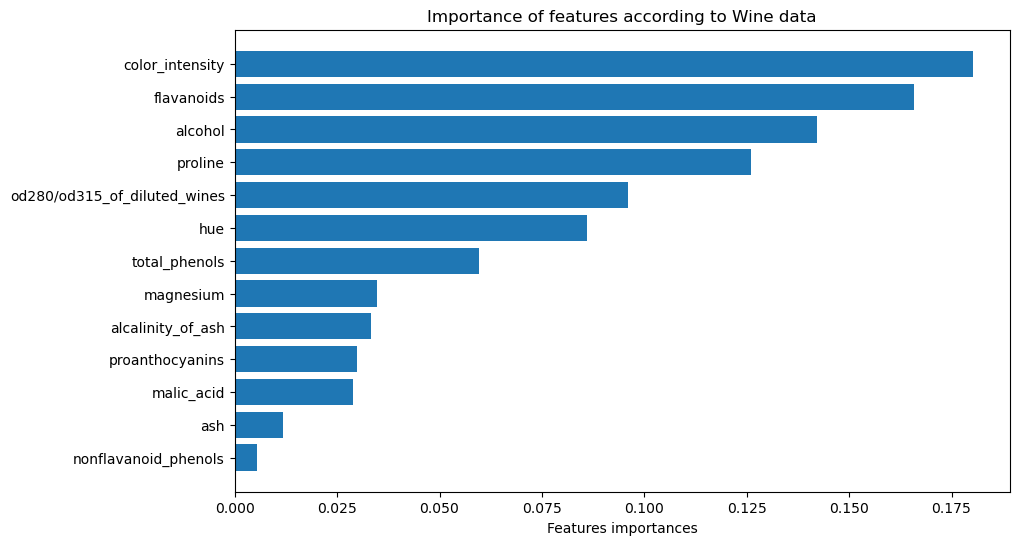

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Features importances')
plt.title('Importance of features according to Wine data')
plt.gca().invert_yaxis() 
plt.show()

In [31]:
# Exercise 3: Recursive Feature Elimination (RFE)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [33]:
# Load the Breast Cancer dataset from scikit-learn.

data = load_breast_cancer()
X = data.data  
y = data.target 

In [35]:
# Split the dataset into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
# Use RFE with a Support Vector Machine (SVM) classifier to select features.

svm = SVC(kernel="linear", random_state=42)  
rfe = RFE(estimator=svm, n_features_to_select=10)  
rfe.fit(X_train, y_train)

RFE(estimator=SVC(kernel='linear', random_state=42), n_features_to_select=10)

In [39]:
# Train an SVM model with the selected features and evaluate its performance.

X_train_rfe = rfe.transform(X_train)  
X_test_rfe = rfe.transform(X_test) 

svm.fit(X_train_rfe, y_train)

SVC(kernel='linear', random_state=42)

In [41]:
y_pred = svm.predict(X_test_rfe)  
accuracy = accuracy_score(y_test, y_pred) 

accuracy

0.9298245614035088

In [43]:
# Exercise 4: L1 Regularization for Feature Selection
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

In [45]:
# Load the Diabetes dataset from scikit-learn.

data = load_diabetes()
X = data.data  
y = data.target  

In [47]:
# Split the dataset into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Apply Lasso regression for feature selection.

lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [175]:
# Train a model using selected features and evaluate its performance.

selected_features = np.where(lasso.coef_ != 0)[0]

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_selected, y_train)

lasso.coef_

array([   0.        , -173.27107577,  558.93812468,  339.35373951,
        -58.72068535,   -0.        , -274.11351588,    0.        ,
        372.83897776,   25.58680152])

In [61]:
# Classification Exercises
# Exercise 1: Logistic Regression

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# Load the Iris dataset from scikit-learn.

iris = load_iris()
X = iris.data
y = iris.target

In [69]:
# Split the dataset into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
# Train a logistic regression model on the training set.

model = LogisticRegression(max_iter=200)  
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [73]:
# Evaluate the model's performance on the test set using accuracy and a confusion matrix.

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)  
conf_matrix = confusion_matrix(y_test, y_pred)  

accuracy


1.0

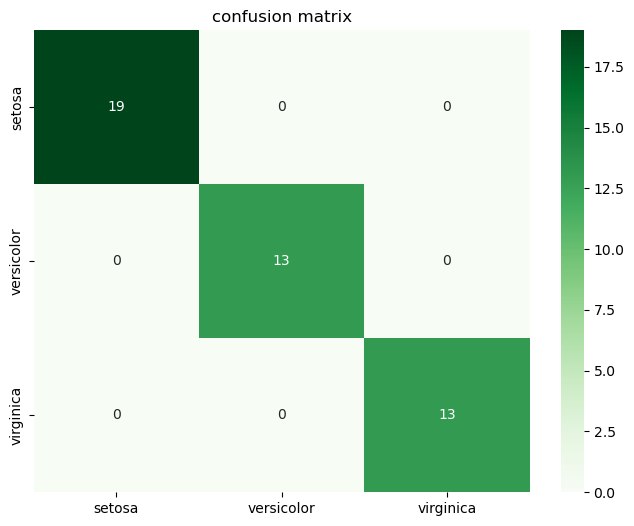

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('')
plt.ylabel('')
plt.title('confusion matrix')
plt.show()

In [93]:
# Exercise 2: Support Vector Machine (SVM)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [95]:
# Load the Breast Cancer dataset from scikit-learn.

data = load_breast_cancer()
X = data.data 
y = data.target  

In [97]:
# Split the dataset into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [99]:
# Train an SVM model on the training data.

model = SVC()
model.fit(X_train, y_train)

SVC()

In [101]:
# Evaluate the model's performance on the test data using accuracy and a confusion matrix.

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[ 52,  11],
       [  0, 108]])

In [103]:
# Exercise 3: Decision Tree Classifier

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [105]:
# Load the Wine dataset from scikit-learn.

data = load_wine()
X = data.data  
y = data.target  

In [107]:
# Split the dataset into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [109]:
# Train a decision tree classifier on the training set.

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

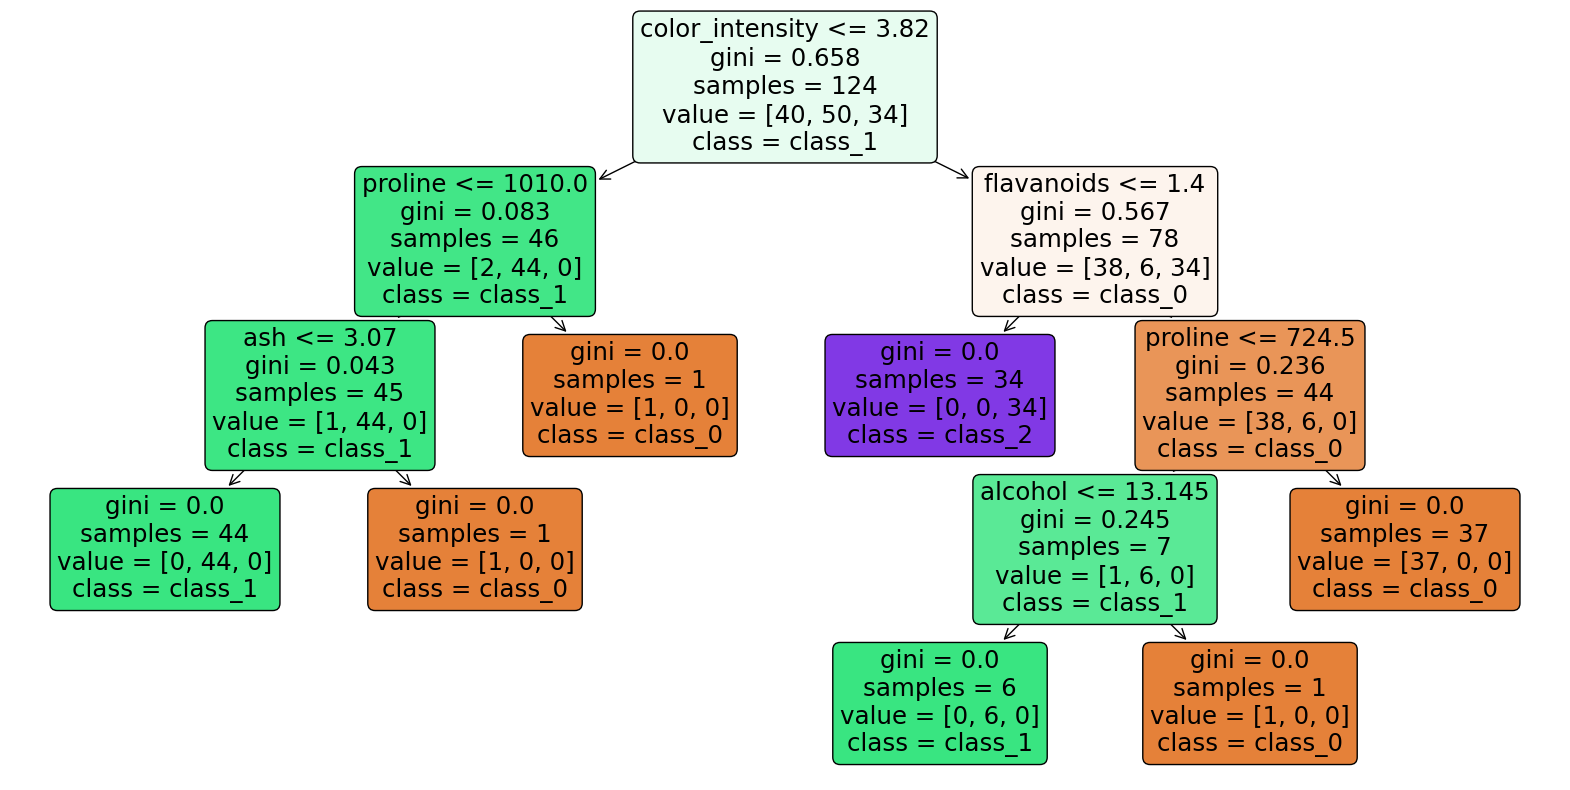

In [111]:
# Visualize the decision tree.

plt.figure(figsize=(20,10)) 

tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()

In [135]:
# Regression Exercises
# Exercise 1: Linear Regression

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [137]:
# Load the Boston Housing dataset from scikit-learn.

housing = fetch_california_housing()

X = housing.data  
y = housing.target  


In [139]:
# Split the dataset into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [141]:
# Train a linear regression model on the training set.

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [151]:
# Evaluate the model's performance using mean squared error (MSE) and R-squared score.

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

f"Mean Squared Error: {mse}"

'Mean Squared Error: 0.5558915986952422'

In [153]:
f"R-squared: {r2}"

'R-squared: 0.5757877060324524'

In [163]:
# Exercise 2: Ridge Regression
# Load the Diabetes dataset from scikit-learn.
from sklearn.linear_model import Ridge

diabetes = load_diabetes()
X = diabetes.data  
y = diabetes.target 

In [159]:
# Split the dataset into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [165]:
# Train a Ridge regression model on the training set.

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

Ridge()

In [167]:
# Evaluate the model's performance using mean squared error (MSE) and R-squared score.

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

f"Mean Squared Error: {mse}"

'Mean Squared Error: 3077.41593882723'

In [169]:
f"R-squared: {r2}"

'R-squared: 0.41915292635986545'

In [189]:
# Exercise 3: Decision Tree Regression

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree



In [173]:
# Load the Boston Housing dataset from scikit-learn.

housing = fetch_california_housing()
X = housing.data
y = housing.target



In [177]:
# Split the dataset into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [183]:
# Train a decision tree regressor on the training set.

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [185]:
# Evaluate the model's performance using mean squared error (MSE).

y_pred = tree_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.4997071473927568